 # Hackaton Clasification
 ----
  
  University : UTEC \\
  Course       : Machine Learning \\
  Professor    : Cristian López Del Alamo \\
  Topic        : Clasification \\
  Deadline      :
   

 ----

Write the names and surnames of the members and the percentage of participation of each one in the development of the practice:
 - Integrante 1: Fabryzzio Meza Torres (%)
 - Integrante 2: (%)
 - Integrante 3: (%)
 - Integrante 4: (%)


 ----


# <font color='red!3'>"Game rules: Read carefully</font>

```
1.  Decídase por un modelo, el que mejor le funcione. Si usa los 3 (SVM, RL o DT), indíquelo en su  ficha de google drive.
2.  Coloque el máximo accuracy alcanzado por su modelo o por sus modelos.
3.  Importante: Use una semilla para replicar su código.
4.  Sólo aquellos códigos en colab que generen exactamente el mismo resultado que los reportados en esta ficha serán tomados en cuenta.




```
Buena Suerte a todos.

In [ ]:
import numpy as np
import math
import pandas as pd
import random
import matplotlib.pyplot as plt
import cvxopt
import seaborn as sns
import itertools
import pywt
import os
from sklearn.metrics import confusion_matrix

# Mel-frequency cepstral coefficient
For obtaining the feature vector from the audio file, we will use the mel-frequency cepstral coefficients [(MFCC).](https://speechprocessingbook.aalto.fi/Representations/Melcepstrum.html), and for  obtain this  mel-frequency from an audio, we will use the librosa [library](https://librosa.org/doc/latest/index.html).

----

The following code shows how to load an audio file with librosa and how to play it.

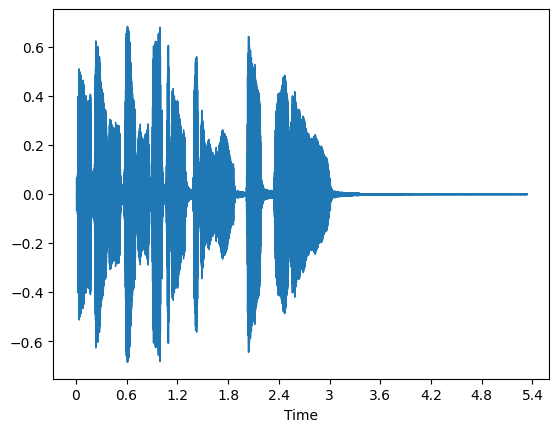

In [ ]:
import librosa
import matplotlib.pylab as plt

from IPython.display import Audio
y, sr = librosa.load(librosa.ex('trumpet'))

librosa.display.waveshow(y, sr=sr)
Audio(data=y, rate=sr)

# Feacture Vector

To obtain the feature vector, we divide the signal into windows. We will have a total of 20 windows, and from each window, we will extract 230 mel coefficients. We then calculate the average of the coefficients from each window, resulting in a 20-dimensional vector for each audio signal. This vector is the characteristic vector that represents an audio signal.

You and your team can vary the way in which the feature vector is obtained. For example, instead of just taking the average of each window, we could take statistical measures such as the mean, maximum value, minimum value, and standard deviation for each window. These values from all the windows could then be combined into a larger characteristic vecto.

----

The following code shows how to obtein the characteristics vector of an audio using mel coefficients.


In [ ]:
y, sr = librosa.load(librosa.ex('trumpet'))
mfccs = librosa.feature.mfcc(y=y, sr=sr)
print("Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows" ,  mfccs.shape)
print("If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal ")
feacture_vector = mfccs.mean(axis = 1)
print(feacture_vector)
print("Vector dimension: " , feacture_vector.shape)

Audio(data=y, rate=sr)

Each windows is represented by a 230-dimensional vector, and the audio has been divided into 20 windows (20, 230)
If we calculate the mean of the coefficients from each of the 20 windows, we will obtain a single 20-dimensional vector. This is the characteristic vector of the audio signal 
[-4.4225790e+02  5.0383911e+01 -7.0578911e+01 -1.8441647e+01
 -1.6287895e+01 -1.8831705e+01 -2.1320690e+01 -1.3630634e+01
 -2.0642900e+01 -1.2660918e+01 -9.4624453e+00 -4.9655876e+00
  3.9786628e-01  4.6334152e+00  4.7938638e+00  4.0112081e+00
  5.0261869e+00  4.7590799e+00  3.7942638e+00  5.7539105e+00]
Vector dimension:  (20,)


# DataSet

Download the dataset from [here](https://drive.google.com/drive/folders/1VfthX0TIhDMsc7rp3ES6ApVwdBLSK4_e?usp=sharing) or simply create a shortcut in your Google Drive.

----

- The following code demonstrates how to load your Google Drive.
- Rewrite the path in case your dataset is located in a different directory on your google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)
# "Rewrite the path in case your dataset is located in a different directory on your drive.
path = '/content/drive/MyDrive/DataSet_Cat_Dog'


Mounted at /content/drive/


**"If your directory is correct, you should be able to listen to the following audio**

In [ ]:
y, sr = librosa.load(path + "/test/dog/dog_barking_15.wav" )
mfccs = librosa.feature.mfcc(y=y, sr=sr)
feacture_vector = np.array(mfccs.mean(axis = 1))
print("Feacture Vector of the dog sound :" , feacture_vector)
Audio(data=y, rate=sr)


# Uncomment to listen to an example of the sound of a cat
y, sr = librosa.load(path + "/test/cat/cat_88.wav" )
Audio(data=y, rate=sr)


Feacture Vector of the dog sound : [-292.7673      118.35525     -60.666008    -29.93634     -27.66046
  -29.684113    -21.906305    -20.586025     -6.1135497   -11.085019
   -2.0999513     7.5590677     0.71641076    4.379524     -2.8995037
  -13.288819     -7.255674     -1.2405517    -4.510544     -4.4990497 ]


The code provided below accepts the path to your database directory and the type of dataset you wish to load as input. The default dataset is 'train', but you can also opt for 'test'. It returns the feature vectors for all the audio files, along with their labels (1, 0, -1) if you're employing SVM. Should you prefer, the labels can be adjusted to 1 or 0 for use with logistic regression.

In [ ]:
import numpy as np
import os

def encode(path, data_type = 'train'):
  data1 = []
  directory_1 = os.listdir(path+"/" +  data_type + "/cat")
  print(directory_1)
  for f  in directory_1:
    y, sr = librosa.load(path +  "/" + data_type + "/cat/" + f)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    fv = mfccs.mean(axis = 1)
    data1.append(fv)
  data = np.array(data1)
  # Important: Here the label is added; in this case, it is 1, but it may vary according to your requirements.
  data  = np.insert(data, 0, 1, axis=1)

  data2 = []
  directory_2 =  os.listdir(path + "/"  + data_type + "/dog")
  for f  in directory_2:
    y, sr = librosa.load(path + "/" +  data_type + "/dog/" + f)
    mfccs = librosa.feature.mfcc(y=y, sr=sr)
    fv = mfccs.mean(axis = 1)
    data2.append(fv)
  temp = np.array(data2)
   # Important: Here the label is added; in this case, it is -1, but it may vary according to your requirements.
  temp = np.insert(temp, 0, -1, axis=1)


  data = np.concatenate((data, temp), axis=0)
  np.random.shuffle(data)
  y = data[:,0]
  x = data[:, 1:]
  return x, y


# Data Train and Data Test

By this point, your team should already have the training and testing data fully prepared for use in your model. Therefore, your team should focus solely on running your models and achieving good results.

In [ ]:
x_train,y_train = encode(path,'train')
x_test, y_test = encode(path, 'test')

['cat_71.wav', 'cat_32.wav', 'cat_154.wav', 'cat_96.wav', 'cat_4.wav', 'cat_35.wav', 'cat_11.wav', 'cat_37.wav', 'cat_73.wav', 'cat_51.wav', 'cat_160.wav', 'cat_8.wav', 'cat_139.wav', 'cat_34.wav', 'cat_166.wav', 'cat_127.wav', 'cat_116.wav', 'cat_107.wav', 'cat_103.wav', 'cat_149.wav', 'cat_87.wav', 'cat_40.wav', 'cat_80.wav', 'cat_102.wav', 'cat_134.wav', 'cat_97.wav', 'cat_100.wav', 'cat_161.wav', 'cat_47.wav', 'cat_38.wav', 'cat_10.wav', 'cat_83.wav', 'cat_113.wav', 'cat_114.wav', 'cat_124.wav', 'cat_123.wav', 'cat_167.wav', 'cat_6.wav', 'cat_105.wav', 'cat_155.wav', 'cat_140.wav', 'cat_1.wav', 'cat_31.wav', 'cat_46.wav', 'cat_163.wav', 'cat_52.wav', 'cat_153.wav', 'cat_39.wav', 'cat_157.wav', 'cat_162.wav', 'cat_16.wav', 'cat_117.wav', 'cat_49.wav', 'cat_69.wav', 'cat_26.wav', 'cat_50.wav', 'cat_84.wav', 'cat_109.wav', 'cat_150.wav', 'cat_2.wav', 'cat_131.wav', 'cat_19.wav', 'cat_25.wav', 'cat_18.wav', 'cat_92.wav', 'cat_23.wav', 'cat_122.wav', 'cat_21.wav', 'cat_78.wav', 'cat_132

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix

def matriz_confusion(y_pred,Tipo):
 matrix = confusion_matrix(y_test, y_pred)
 f2 = pd.DataFrame(matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis], index=["Dog", 'Cat'], columns=["Dog", 'Cat'])
 sns.heatmap(f2, annot=True, cbar=None, cmap="Greens")
 plt.title("Confusion Matrix"  + Tipo ), plt.tight_layout()
 plt.xlabel("Predicted")
 plt.ylabel("Real")
 plt.show()

# Model

Here, write your code. It can be SVM  or Decision Tree. Use the one that works best for you. If you have two or all three ready, even better—test which of the three models yields the best result.

----

## Remember, the code must be entirely programmed by your team.

In [ ]:
class SVM:
  def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
    self.lr = learning_rate
    self._lambda = lambda_param
    self.n_iters = n_iters
    self.w = None
    self.b = None

    def h(X,w,b):
      return np.dot(X,w) + b

    def loss(y,y_aprox,C, W):
      regularizacion = 1/2 * np.linalg.norm((W))**2
      suma = C * np.sum(np.maximum(0, 1 - y * y_aprox))
      return regularizacion + suma

    def derivatives(x, y, y_aprox, w, b, C):
      n = len(y)
      dw = np.zeros_like(w)
      db = 0

      for i in range(n):
        if y[i] * y_aprox[i] < 1:
          dw += w - C * y[i] * x[i]
          db -= C * y[i]
        else:
          dw += w

      dw /= n
      db /= n

      return dw, db

    def Update(y,y_aprox,w, b, db, dw, alpha,C):
      w = w - alpha * dw
      b = b - alpha * db
      return w, b

    def training(X, Y, C, alpha, epochs):
      w = np.array([np.random.seed(11) for i in range(X.shape[1])])
      b = np.random.rand()
      error = []

      for i in range(epochs):
        Y_aprox = h(X,w,b)
        dw, db = derivatives(X, Y,Y_aprox, w, b, C)
        w, b = Update(Y,Y_aprox,w, b, db, dw, alpha,C)
        L = loss(Y,Y_aprox,C, w)
        error.append(L)
        
      return w, b, error

###Hypothesis

In [ ]:
def h(X,w,b):
  return np.dot(X, w) + b

###Loss function

In [ ]:
def loss(y,y_aprox,W,C):
  fT = 0.5 * (np.linalg.norm(W)**2)
  sT =np.sum(np.maximum(0,1-y*y_aprox))
  return fT + C*sT

###Derivatives

In [ ]:
def derivatives(x, y,y_aprox, w, b, C):
    cnd= y*y_aprox<1
    dw=C*np.sum(-y[cnd,np.newaxis]*x[cnd],axis=0)+w
    db = C*np.sum(-y[cnd])
    return dw, db

###Update

In [ ]:
def Update(x,y,y_aprox,w, b, db, dw, alpha):
  w -= alpha*dw
  b -= alpha*db
  return w,b

###Training

In [ ]:
def training(X, Y, C, alpha, epochs):
  w = np.array([np.random.rand() for i in range(X.shape[1])])
  b = np.random.rand()
  error = []
  for i in range(epochs):
    Y_aprox = h(X,w,b)
    dw, db = derivatives(X, Y,Y_aprox, w, b, C)
    w, b = Update(X,Y,Y_aprox,w, b, db, dw, alpha)
    L = loss(Y,Y_aprox,w,C)
    error.append(L)
  return w, b, error

###Testing

In [ ]:
def testing(X,W,b):
  y_aprox = []
  # write your code here
  for i in range(X.shape[0]):
    y_aprox.append(np.sign(h(X,W,b)[i]))
  return np.array(y_aprox)

# Test

Your model will have a predict function. It receives the x test data and returns a prediction, just as shown in the following code. This result will be used to create the confusion matrix as well as the metrics report



In [ ]:
def normalizacion(data):
  return data/np.linalg.norm(data)

In [ ]:
train_x_norm = np.apply_along_axis(normalizacion, 1, x_train)
test_x_norm = np.apply_along_axis(normalizacion, 1, x_test)

W, b, e1, = training(train_x_norm, y_train, 100, 0.00001, 80000)
y_pred_a = testing(test_x_norm, W, b)
y_test_a = y_test.astype('int')
correct=np.sum(y_pred_a==y_test_a)

print("Clasificados correctamente:", correct)
print("Clasificados incorrectamente:", len(y_test_a)-correct)
print("% de efectividad", round(100*correct/len(y_test), 2))

Clasificados correctamente: 61
Clasificados incorrectamente: 6
% de efectividad 91.04


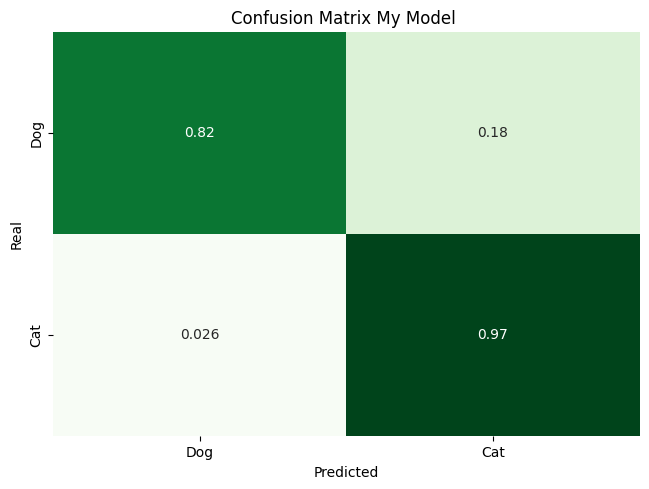

In [ ]:
matriz_confusion(y_pred_a," My Model ")

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred_a, target_names = ["Dogs", "Cats"])
print(" My Model Metrics  ")
print(report)